y are [ 0.         -0.34377154 -0.65392647 -0.98204211 -1.312706   -1.68494546
 -2.18278389 -2.57224866]
ysig are [9.17431193e-07 2.37212421e-03 8.30014114e-03 2.74846620e-02
 5.43624349e-02 6.97112970e-02 9.56268423e-02 1.60734862e-01]
diff -0.3413984974655629
diff -0.29948266295451165
diff -0.2923308389114133
diff -0.2488167981378992
diff -0.2481657285720001
diff -0.3325002889823052
diff -0.1331030621153536


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


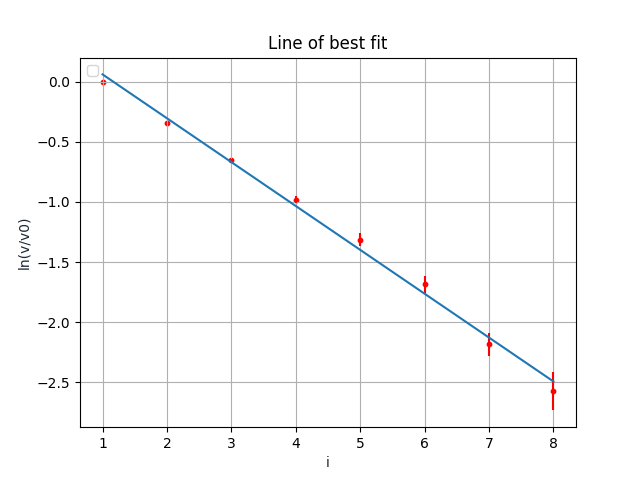

In [115]:
import numpy as np
import matplotlib.pyplot as plt

#define data
#x = np.array([1.33,2,3,4,5,6,7,8])
#lny = np.array([-0.474, 0.058, 0.425]) case m1 - m2 / m1
t = np.array([1.517,1.792,1.987,2.130,2.233,2.307,2.358,2.389,2.410])
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([1.1,2,3,4,5,6,7,8])
v = np.array([None] * 8)
Tsigma = np.array([0.008,0.006,0.005,0.005,0.005,0.004,0.003,0.003])
Ysigma = np.array([0.008,0.006,0.005,0.005,0.005,0.004,0.003,0.003])
for i in range(len(t)-1):
    v[i] = 4.905 * ( t[i+1] - t[i])
for i in range(len(v)):
    y[i] = np.log(v[i]/v[0])
for i in range(len(v)):
    Ysigma[i] = ((6.93*Tsigma[i])/v[i]) - 0.0411
    
print ("y are" , y)
print ("ysig are", Ysigma)
for i in range(len(v)-1):
    #print("y are" , y[i])
    #print("ysig are" , Ysigma[i])
    #print("y diff is " , y[i+1] - y[i])
    #print("sigma add is" , Ysigma[i] + Ysigma[i+1])
    print("diff" ,  (Ysigma[i] + Ysigma[i+1]) - np.abs((y[i+1] - y[i])))
    #print("change > sigma?" , y[i+1] - y[i] > Ysigma[i] + Ysigma[i+1])



#then not dependent


#find line of best fit
#weights = [(1/sta)**2, (1/sta)**2, (1/sta)**2,(1/sta)**2,(1/sta)**2,(1/sta)**2,(1/sta)**2,(1/sta)**2]
a, b = np.polyfit(x , y, 1)#, w = weights, cov = True)[0]

#add points to plot
plt.scatter(x, y, s = 10, c = 'r')
plt.errorbar(x,y,yerr = Ysigma,xerr = 0,ls='none',c = 'r')
#add line of best fit to plot
plt.plot(x, a *x+b)
plt.title('Line of best fit')
plt.xlabel('i', color='#1C2833')
plt.ylabel('ln(v/v0)', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()